<h1>Given The Following Integral :</h1>

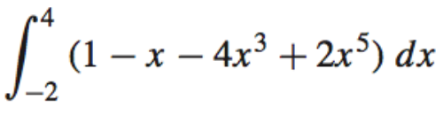

<h2>1a) Evaluate Analytically(In Exact)</h2>

In [32]:
# np.abs(*args) for error calculation.
import numpy as np

In [49]:
def function(x):
    return 1 - x - 4*(x**3) + 2*(x**5)

In [50]:
def integrated_function(x):
    '''
    Result = integrated_function(x = None) + C, C ∈ R
    '''
    return x - (x**2 / 2) - (x**4) + (x**6 / 3)

In [51]:
exact_res = integrated_function(4) - integrated_function(-2)

In [52]:
print("Analytical Result = {}".format(str(exact_res)))

Analytical Result = 1104.0


<hr>

<h2>1b) Evaluate Using The Trapezoidal Rule With A Single Segment</h2>

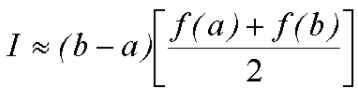

In [53]:
def trapezoid(a: float, b: float):
    return (b - a) * ((function(a) + function(b)) / 2)

In [54]:
trapezoid_res = trapezoid(-2, 4)

In [55]:
print("Result = {}".format(str(trapezoid_res)))

Result = 5280.0


<h2>Abs. Relative True Error Value :</h2>

In [56]:
# Something's Wrong.
abs_el = np.abs(((exact_res - trapezoid_res) / exact_res))
print("Abs. Relative True Error = " + str(abs_el * float(100.0)) + " %")

Abs. Relative True Error = 378.2608695652174 %


<hr>

<h2>1c) Evaluate Using Segmented Trapezoidal Rule With Parameter n = 4</h2>

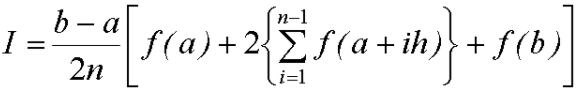

In [61]:
def trapezoid_segmented(a, b, n):
    h = (b - a) / n
    s = 0
    for i in range(1, n):
        s += function(a + i * h)
    return (b - a) * (function(a) + 2 * s + function(b)) / (2 * n)

In [62]:
trapezoid_segmented_res = trapezoid_segmented(-2, 4, 4)

In [63]:
print("Result = {}".format(str(trapezoid_segmented_res)))

Result = 1516.875


<h2>Abs. Relative True Error Value :</h2>

In [64]:
abs_el = np.abs((exact_res - trapezoid_segmented_res) / exact_res)
print("Abs. Relative True Error = " + str(abs_el * float(100.0)) + " %")

Abs. Relative True Error = 37.39809782608695 %


<hr>

<h2>1d) Evaluate Using Simpson's 1/3 Rule With A Single Segment</h2>

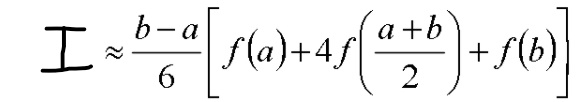

In [65]:
def simpson_s_one_third(a, b):
    single_h = (b - a) / 6
    inner = function(a) + (4 * (function((a + b) / 2))) + function(b)
    return single_h * inner

In [66]:
simpson_s_one_third_res = simpson_s_one_third(-2, 4)

In [67]:
print("Result = {}".format(str(simpson_s_one_third_res)))

Result = 1752.0


<h2>Abs. Relative True Error Value :</h2>

In [68]:
abs_el = np.abs((exact_res - simpson_s_one_third_res) / exact_res)
print("Abs. Relative True Error = " + str(abs_el * float(100.0)) + " %")

Abs. Relative True Error = 58.69565217391305 %


<hr>

<h2>1e) Evaluate Using Segmented Simpson's 1/3 Rule With Parameter n = 4</h2>

In [71]:
def simpson_s_one_third_segmented(a, b, n):
    segmented_h = (b - a) / n
    
    # Lists To Store Values Of X And F(X).
    x = []
    f_x = []
    
    # Calculating Values Of X And F(X).
    i = 0
    while(i <= n):
        x.append(a + i * segmented_h)
        f_x.append(function(x[i]))
        i += 1
    
    # Calculating Result.
    res = 0
    i = 0
    while(i <= n):
        if i == 0 or i == n:
            res += f_x[i]
        elif i % 2 != 0:
            res += 4 * f_x[i]
        else:
            res += 2 * f_x[i]
        i += 1
    res *= (segmented_h / 3)
    return res

In [73]:
simpson_s_one_third_segmented_res = simpson_s_one_third_segmented(-2, 4, 4)

In [74]:
print("Result = {}".format(str(simpson_s_one_third_segmented_res)))

Result = 1144.5


<h2>Abs. Relative True Error Value :</h2>

In [75]:
abs_el = np.abs((exact_res - simpson_s_one_third_segmented_res) / exact_res)
print("Abs. Relative True Error = " + str(abs_el * float(100.0)) + " %")

Abs. Relative True Error = 3.6684782608695654 %


<hr>

<h2>1f) Evaluate Using Simpson's 3/8 Rule With A Single Segment</h2>

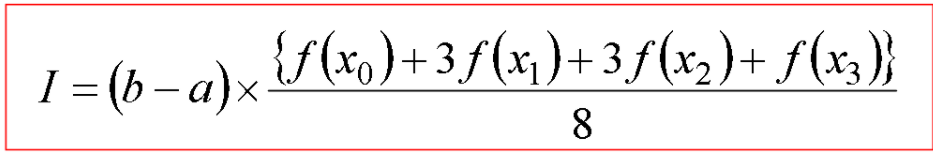

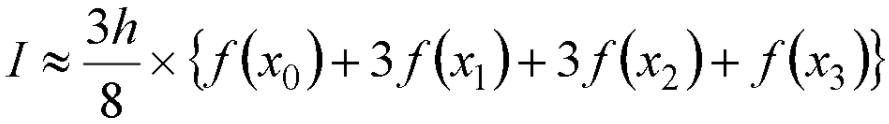

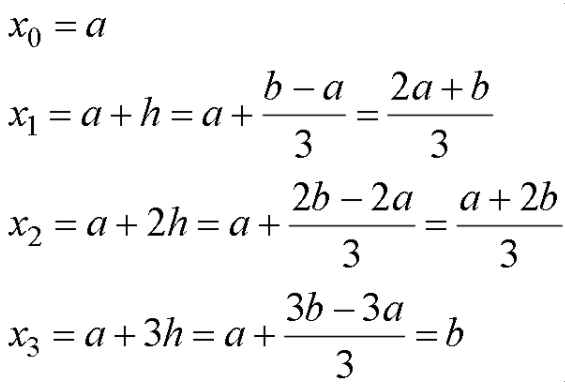

In [102]:
def simpson_s_three_over_eight(a, b):
    try:
        h = (b - a) / 3
        x_0 = a
        x_1 = a + h
        x_2 = a + (2 * h)
        x_3 = b
    finally:
        return (3 * h * (function(x_0) + (3 * function(x_1)) + (3 * function(x_2)) + function(x_3))) / 8

In [103]:
simpson_s_three_over_eight_res = simpson_s_three_over_eight(-2, 4)

In [104]:
print("Result = {}".format(str(simpson_s_three_over_eight_res)))

Result = 1392.0


<h2>Abs. Relative True Error Value :</h2>

In [105]:
abs_el = np.abs((exact_res - simpson_s_three_over_eight_res) / exact_res)
print("Abs. Relative True Error = " + str(abs_el * float(100.0)) + " %")

Abs. Relative True Error = 26.08695652173913 %


<hr>

<h2>1g) Evaluate Using Segmented Simpson's 3/8 Rule With Parameter n = 4</h2>

In [106]:
def simpson38_segmented(a, b, n):
    # Calculating step size.
    h = (b - a) / n
    
    # Finding sum. 
    integrate_sum = function(a) + function(b)
    
    for i in range(1, n):
        k = a + i * h
        
        if i % 2 == 0:
            integrate_sum += 2 * function(k)
        else:
            integrate_sum += 3 * function(k)
    
    # Finding final integration value.
    integrate_sum *= ((3 * h) / 8)
    
    return integrate_sum

In [107]:
simpson38_segmented_res = simpson38_segmented(-2, 4, 4)

In [108]:
print("Result = {}".format(str(simpson38_segmented_res)))

Result = 1212.609375


<h2>Abs. Relative True Error :</h2>

In [83]:
abs_el = np.abs((exact_res - simpson38_segmented_res) / exact_res)
print("Abs. Relative True Error = " + str(abs_el * float(100.0)) + " %")

Abs. Relative True Error = 9.837805706521738 %


<hr>

<h2>2a) Numerically Integrate The Specified Function Using Gaussian Quadrature Method</h2>

In [99]:
# Using the method scipy.integrate.quadrature(**kwargs).
from scipy.integrate import quadrature

In [100]:
# Function to be integrated.
function = lambda x: 1 - x - (4*(x**3)) + (2*(x**5))

In [101]:
print(quadrature(func = function, a = -2, b = 4, vec_func = True))
# Returns tuple -> (val(Gaussian Quadrature Approximation), err)

(1104.0, 4.547473508864641e-13)


<hr>